In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [27]:
def synthetic_data(w,b,num_examples):#@save
    X=torch.normal(0,1,(num_examples,len(w)))
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))
true_w=torch.tensor([2,3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([ 0.2664, -0.6704]) 
label: tensor([2.4701])


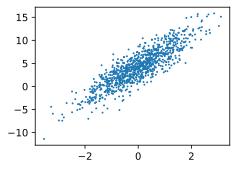

In [22]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1)

In [37]:
def data_iter(batch_size,feature,labels):
    # 样本的数量
    num_examples=len(features)
    # 为每个样本创建索引
    indices=list(range(num_examples))
    # 打乱索引
    random.shuffle(indices)


    for i in range(0,num_examples,batch_size):
        # 定义索引集合，把每次的batch_size个索引放入
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num_examples)])
        # 将样本、标签按索引取出
        yield features[batch_indices],labels[batch_indices]

In [38]:
batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,"\n",y)
    break

tensor([[-0.4286, -1.2652],
        [-1.2617, -0.5477],
        [-2.1450, -0.3163],
        [ 1.6464,  0.5665],
        [-1.0360,  0.1191],
        [ 0.3522,  0.6961],
        [-1.4857, -0.5874],
        [-0.8965, -0.7444],
        [ 2.0400,  0.0489],
        [-1.2010, -0.1369]]) 
 tensor([[-0.9540],
        [-0.1822],
        [-1.1528],
        [ 9.3968],
        [ 2.5201],
        [ 7.2713],
        [-0.7517],
        [-0.1098],
        [ 8.4567],
        [ 1.3441]])


In [40]:
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

In [41]:
def linreg(X, w, b):  # @save
    """线性回归模型"""
    return torch.matmul(X, w) + b


def squared_loss(y_hat, y):  # @save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2


def sgd(params, lr, batch_size):  # @save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()


In [42]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')


epoch 1, loss 0.037971
epoch 2, loss 0.000147
epoch 3, loss 0.000055


In [43]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')


w的估计误差: tensor([-0.0001, -0.0002], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0007], grad_fn=<RsubBackward1>)
